In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
mag_df = pd.read_csv('/home/haxixe/pml_grafita/database/csv/mag_df.csv')
mag_df.head()

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.66 7624043.9)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.49 7624052.04)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.32 7624060.18)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.15 7624068.32)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.98 7624076.47)


In [5]:
mag_df.shape

(11639600, 10)

In [6]:
mag_df.drop(['Unnamed: 0'],axis=1)

,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.66 7624043.9)
1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.49 7624052.04)
2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.32 7624060.18)
3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.15 7624068.32)
4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.98 7624076.47)
...,...,...,...,...,...,...,...,...,...
11639595,602870.41,7526564.70,574.08,-22.363787,-44.000863,-25.681,23211.627,23224.542,POINT (602870.41 7526564.7)
11639596,602870.46,7526558.68,573.60,-22.363842,-44.000862,-25.654,23211.641,23224.616,POINT (602870.46 7526558.68)
11639597,602870.50,7526553.15,573.19,-22.363892,-44.000861,-25.627,23211.673,23224.710,POINT (602870.5 7526553.15)
11639598,602870.53,7526548.22,572.86,-22.363936,-44.000861,-25.608,23211.685,23224.788,POINT (602870.53 7526548.22)


In [7]:
mag_df.shape

(11639600, 10)

In [8]:
mag_df.head(100)

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.66 7624043.9)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.49 7624052.04)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.32 7624060.18)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.15 7624068.32)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.98 7624076.47)
...,...,...,...,...,...,...,...,...,...,...
95,95,292875.91,7624816.99,602.45,-21.467245,-46.998931,-38.866,23025.277,23032.544,POINT (292875.91 7624816.99)
96,96,292876.05,7624825.15,602.33,-21.467172,-46.998929,-39.895,23024.253,23031.524,POINT (292876.05 7624825.15)
97,97,292876.18,7624833.31,602.22,-21.467098,-46.998926,-40.851,23023.303,23030.577,POINT (292876.18 7624833.31)
98,98,292876.32,7624841.47,602.12,-21.467024,-46.998924,-41.762,23022.396,23029.676,POINT (292876.32 7624841.47)


In [9]:
mag_df['geometry'] = [geometry.Point(x, y) for x, y in zip(mag_df['X'], mag_df['Y'])]

In [10]:
mag_df.head()

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.66 7624043.9)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.49 7624052.04)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.32 7624060.18)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.15 7624068.32)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.98 7624076.47)


In [11]:
crs ="+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
mag_df = gpd.GeoDataFrame(mag_df, geometry='geometry', crs=crs)
mag_df.head()

,Unnamed: 0,X,Y,MDT,LATITUDE,LONGITUDE,MAGIGRF,MAGMIC,MAGNIV,geometry
0,0,292879.66,7624043.90,609.44,-21.474226,-46.998990,49.882,23113.580,23119.835,POINT (292879.660 7624043.900)
1,1,292879.49,7624052.04,609.53,-21.474153,-46.998991,50.469,23114.171,23120.439,POINT (292879.490 7624052.040)
2,2,292879.32,7624060.18,609.60,-21.474079,-46.998991,50.987,23114.677,23120.958,POINT (292879.320 7624060.180)
3,3,292879.15,7624068.32,609.66,-21.474006,-46.998992,51.473,23115.181,23121.473,POINT (292879.150 7624068.320)
4,4,292878.98,7624076.47,609.71,-21.473932,-46.998993,51.945,23115.658,23121.963,POINT (292878.980 7624076.470)


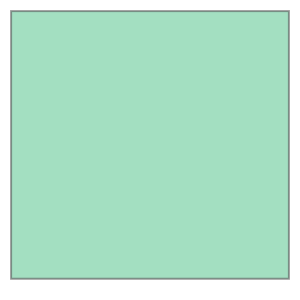

In [12]:
bounds = geometry.Polygon([(329409.535034, 7.628650e+06), (344083.383476, 7.628650e+06), 
                           (344083.383476, 7.614512e+06), (329409.535034, 7.614512e+06)])
area = bounds.area

bounds

In [13]:
cond1 = mag_df.intersects(bounds)
mag_df = mag_df[cond1]

In [25]:
mag_df.shape

(597853, 10)

In [15]:
mag_df.to_csv('../database/csv/mag_caconde.csv')